<a href="https://colab.research.google.com/github/er-jk/CNN/blob/main/Cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cnn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!pip install tensorflow
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import datasets, layers, models

In [ ]:
tf.__version__

'2.6.0'

In [ ]:

train_datagen = ImageDataGenerator(rescale=1./255, shear_range= 0.2, zoom_range=0.2, horizontal_flip= True)

training_set = train_datagen.flow_from_directory(directory= "/content/drive/MyDrive/Deep_learning_lab/cat_and_dog/training_set/training_set", target_size=(64, 64), batch_size=32, class_mode= 'binary')

Found 8005 images belonging to 2 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory(directory= "/content/drive/MyDrive/Deep_learning_lab/cat_and_dog/test_set/test_set", target_size=(64, 64), batch_size=32, class_mode= 'binary')

Found 2023 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2

Building the Cnn

In [ ]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32, padding='same', kernel_size=3, activation='relu', strides=2, input_shape = [64,64,3]))

cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

Adding a second convolution layer

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, padding='same', kernel_size=3, activation='relu', strides=2, input_shape = [64,64,3]))

cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))


cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

cnn.add(Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01), activation='linear'))

Traing CNN

In [ ]:
cnn.compile(optimizer='adam', loss='squared_hinge', metrics=['accuracy'])
r = cnn.fit(x = training_set, validation_data= test_set, epochs=10)

Epoch 1/10
251/251 [==============================] - 52s 204ms/step - loss: 0.7361 - accuracy: 0.6405 - val_loss: 0.7132 - val_accuracy: 0.6303
Epoch 2/10
251/251 [==============================] - 50s 200ms/step - loss: 0.7163 - accuracy: 0.6510 - val_loss: 0.7111 - val_accuracy: 0.7069
Epoch 3/10
251/251 [==============================] - 50s 198ms/step - loss: 0.6884 - accuracy: 0.6647 - val_loss: 0.7149 - val_accuracy: 0.7311
Epoch 4/10
251/251 [==============================] - 50s 199ms/step - loss: 0.6737 - accuracy: 0.6761 - val_loss: 0.6720 - val_accuracy: 0.7054
Epoch 5/10
251/251 [==============================] - 51s 202ms/step - loss: 0.6658 - accuracy: 0.6795 - val_loss: 0.7785 - val_accuracy: 0.7464
Epoch 6/10
251/251 [==============================] - 50s 199ms/step - loss: 0.6519 - accuracy: 0.6862 - val_loss: 0.6614 - val_accuracy: 0.7034
Epoch 7/10
251/251 [==============================] - 51s 202ms/step - loss: 0.6377 - accuracy: 0.6936 - val_loss: 0.6417 - val_ac

plot the loss

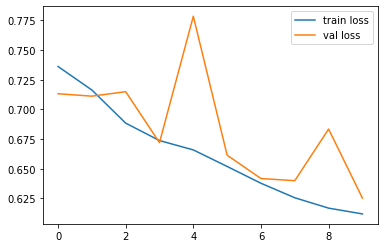

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label = 'train loss')
plt.plot(r.history['val_loss'], label = 'val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

Accuracy Plot

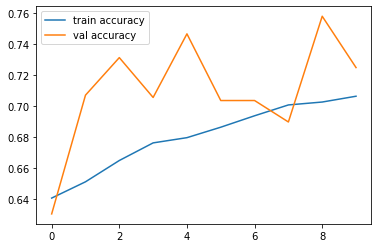

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(r.history['accuracy'], label = 'train accuracy')
plt.plot(r.history['val_accuracy'], label = 'val accuracy')
plt.legend()
plt.show()
plt.savefig('AccuracyVal_acc')

In [ ]:
from tensorflow.keras.models import load_model
cnn.save("model_rcat_dog.h5")
model=load_model("model_rcat_dog.h5")

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 32)          9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image=image.load_img("/content/drive/MyDrive/Deep_learning_lab/cat_and_dog/cat.jpg",target_size=(64,64))
test_image=image.img_to_array(test_image)
test_image=test_image/255
test_image=np.expand_dims(test_image,axis=0)
result=cnn.predict(test_image)
print(result)
if result[0]>0:
  print("The image classified is Cat")
else:
  print("The image classified is Dog")

[[0.11631071]]
The image classified is Cat
